# Support Vector Regression



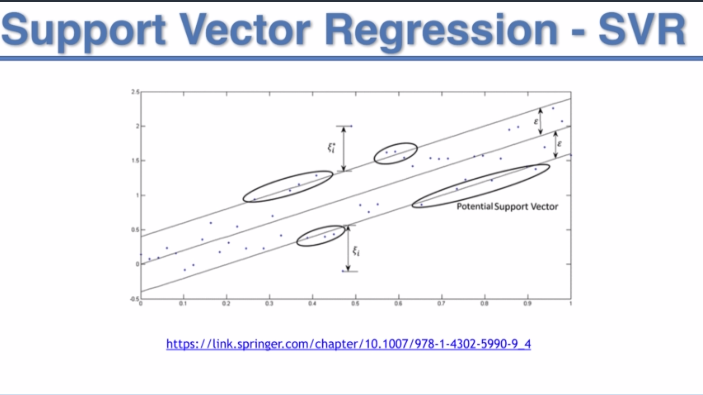


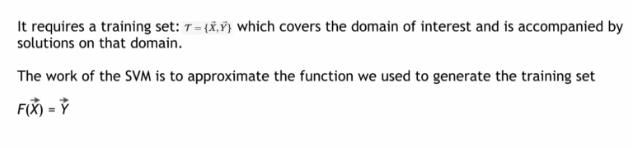


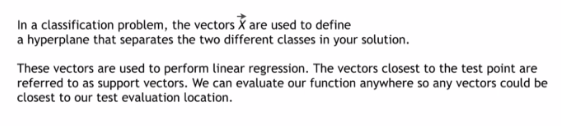


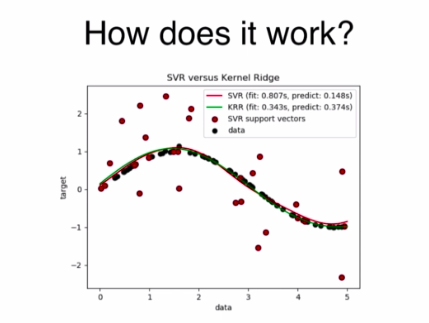


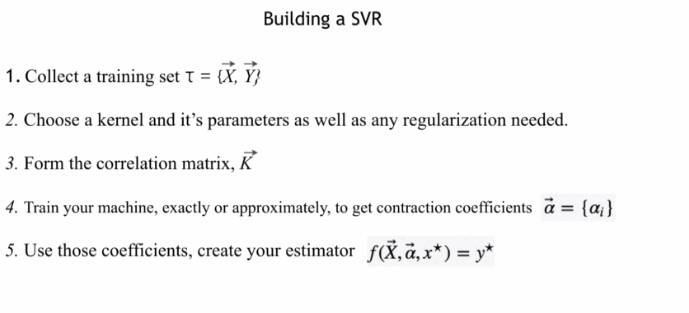

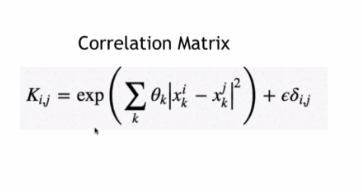

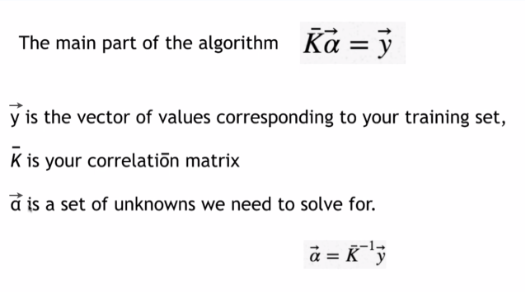

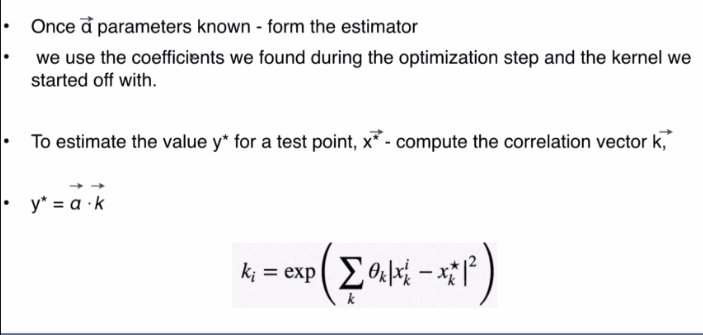

# Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd



# Importing the dataset


In [2]:
dataset = pd.read_csv('Position_Salaries.csv')
print(dataset.head(10))
print(dataset.describe())


            Position  Level   Salary
0   Business Analyst      1    45000
1  Junior Consultant      2    50000
2  Senior Consultant      3    60000
3            Manager      4    80000
4    Country Manager      5   110000
5     Region Manager      6   150000
6            Partner      7   200000
7     Senior Partner      8   300000
8            C-level      9   500000
9                CEO     10  1000000
          Level          Salary
count  10.00000       10.000000
mean    5.50000   249500.000000
std     3.02765   299373.883668
min     1.00000    45000.000000
25%     3.25000    65000.000000
50%     5.50000   130000.000000
75%     7.75000   275000.000000
max    10.00000  1000000.000000


# Splitting the dataset into Independent and Dependent Variable


In [3]:
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2:3].values

print("-----X----")
print(X[:10])
print(type(X))
print(X.shape)
print("-----y----")
print(y[:10])
print(y.shape)


-----X----
[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
<class 'numpy.ndarray'>
(10, 1)
-----y----
[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]
(10, 1)



# Feature Scaling

In [17]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = np.array(y).reshape(-1,1)
y = sc_y.fit_transform(y)
y = y.flatten()

y = np.array(y).reshape(-1,1)
y = sc_y.fit_transform(y)




# Fitting SVR to the dataset


In [18]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X, y)



C:\Users\USER\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

# Predicting a new result


In [29]:


y_pred = sc_y.inverse_transform(sc_X.transform(np.array(regressor.predict([[6.5]])).reshape(1, -1)))



In [30]:

y_pred = regressor.predict([[6.5]])

y_pred = sc_y.inverse_transform(y_pred)

# Visualising the SVR results

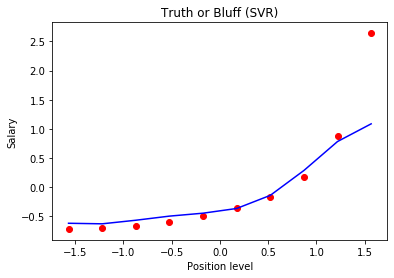

In [31]:

plt.scatter(X, y, color = 'red')
plt.plot(X, regressor.predict(X), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()




# Visualising the SVR results (for higher resolution and smoother curve)

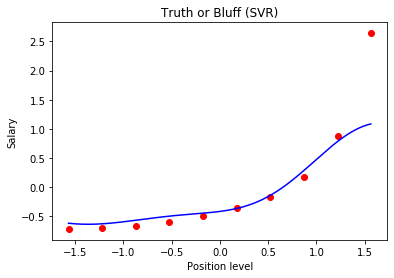

In [32]:


X_grid = np.arange(min(X), max(X), 0.01) # choice of 0.01 instead of 0.1 step because the data is feature scaled
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()